In [1]:
import torch
from tqdm.auto import tqdm

g_losses = []
d_losses = []
for i in tqdm(range(100)):
    PATH = f"checkpoint/codet5_gan_batch_8_1657908305_epoch_{i}.pt"
    # PATH = f"checkpoint/plbart_small_set_batch_8_1657183236_epoch_{i}.pt"
    checkpoint = torch.load(PATH, map_location=torch.device('cpu'))
    g_losses += [checkpoint["g_loss"]]
    d_losses += [checkpoint["d_loss"]]
    # checkpoint["g_loss"], checkpoint["d_loss"]

  0%|          | 0/100 [00:00<?, ?it/s]

In [2]:
g_losses = [loss.item() for loss in g_losses]

In [3]:
d_losses = [loss.item() for loss in d_losses]

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

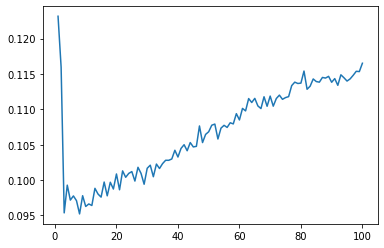

In [8]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
plt.plot(list(range(1, 100+1)), g_losses);  # Plot some data on the axes.

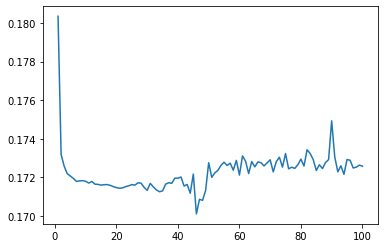

In [9]:
plt.plot(list(range(1, 100+1)), d_losses);  # Plot some data on the axes.

In [11]:

from data import (
    STYLE_DIM,
    get_data_loader,
    cluster_labels_no_outliers,
    train_dataset,
    test_dataset,
)

from model import InRepPlusGAN, Discriminator

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [12]:
from utils.model_utils import label_tensor_to_one_hot

style_encoding = label_tensor_to_one_hot(
    torch.Tensor([1]).long(), STYLE_DIM
)#.to(device)

In [13]:

from transformers import PLBartTokenizer
tokenizer = PLBartTokenizer.from_pretrained(
    "uclanlp/plbart-multi_task-python",
    language_codes="multi",
    src_lang="python",
    tgt_lang="python",
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [15]:
from data import train_dataset
from datasets import Dataset
train_dataset = Dataset.from_dict(train_dataset[:64])
example = train_dataset["input_ids"][0]

In [16]:
tokenizer.batch_decode([example], skip_special_tokens=True)

['from pycp2k.inputsection import InputSection class _cutoff_calib6(InputSection): def __init__(self): InputSection.__init__(self) self.Min = None self.Max = None self.Delta = None self.Eps = None self._name = "CUTOFF_CALIB" self._keywords = {\'Delta\': \'DELTA\', \'Eps\': \'EPS\', \'Min\': \'MIN\', \'Max\': \'MAX\'}']

In [17]:

style_encoding = label_tensor_to_one_hot(
    torch.Tensor([1]).long(), STYLE_DIM
)#.to(device)

generator = InRepPlusGAN(style_dim=STYLE_DIM)#.to(device)
generator.load_state_dict(checkpoint['g_state_dict'])
generator_output, modifier_output = generator(
    input_ids=torch.Tensor(example).long().unsqueeze(0),
    # attention_mask=input_batch["attention_mask"],
    style_encoding=style_encoding,
)
generated_tokens = generator_output.logits.argmax(-1)
tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

['import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import import impo